In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ipykernel
import sklearn

print("Numpy Version: ",np.__version__)
print("Pandas Version: ",pd.__version__)
print("Matplotlib Version: ",matplotlib.__version__)
print("Sklearn Version: ",sklearn.__version__)
print("ipykernel Version: ",ipykernel.__version__)

Numpy Version:  2.0.2
Pandas Version:  2.3.3
Matplotlib Version:  3.9.4
Sklearn Version:  1.6.1
ipykernel Version:  6.31.0


# 🔥 Supervised Learning Algorithms — Regression  
Understanding Linear Regression, Polynomial Regression, Ridge Regression, and Lasso Regression with code examples.


# 📌 What is Regression?

Regression is a supervised machine learning technique used to:
- Predict **continuous numerical values**
- Understand the relationship between features and output

### ✔ Examples of regression:
- Predicting house prices  
- Predicting temperature  
- Predicting sales revenue  
- Predicting exam marks based on study hours  

Machine learns a mapping:  
### `X (input features) → y (continuous output)`


# Importing necessary libraries

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# ⭐ 1. Linear Regression

Linear Regression predicts the output using a **straight line**:

### 📌 Equation:
y = m*x + c

Where:
- `m` → slope  
- `c` → intercept  

### ✔ When to use?
- When the relationship between X and y is **linear**
- Example: Exam score increases linearly with study hours

### ✔ Goal:
Minimize **Mean Squared Error (MSE)**  


Slope (m): 9.500000000000002
Intercept (c): 30.499999999999993
Predicted marks for 6 hours: 87.5


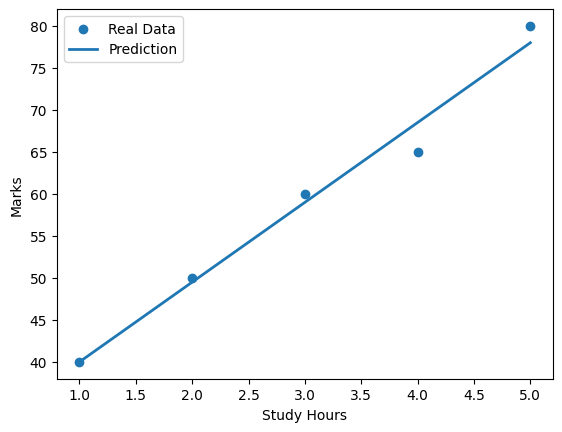

In [4]:
# Simple Linear Regression Example

# X = hours studied
X = np.array([[1], [2], [3], [4], [5]])
# y = exam marks
y = np.array([40, 50, 60, 65, 80])

model = LinearRegression()
model.fit(X, y)

print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Predict marks for 6 hours study
print("Predicted marks for 6 hours:", model.predict([[6]])[0])

# Plot
plt.scatter(X, y, label='Real Data')
plt.plot(X, model.predict(X), label='Prediction', linewidth=2)
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.legend()
plt.show()


# 🔥 Linear Regression from Scratch

We will create a Python class for Linear Regression that supports:

1. Fitting using **Gradient Descent**  
2. Predicting new data  
3. Storing `coef_` and `intercept_`  
4. Multi-feature support  
5. Loss tracking (MSE)

### Formula:
For a dataset X, y:

y_pred = X.dot(w) + b

Loss (MSE):

MSE = (1/n) * Σ(y_i - y_pred_i)^2

Gradient Descent updates:

w := w - lr * dL/dw
b := b - lr * dL/db


In [14]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, n_iters=1000):
        """
        lr: learning rate
        n_iters: number of iterations for gradient descent
        """
        self.lr = lr
        self.n_iters = n_iters
        self.coef_ = None  # weights
        self.intercept_ = None
        self.loss_history = []
    
    def fit(self, X, y):
        """
        Fit the linear regression model using gradient descent
        """
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0
        
        # Gradient Descent
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.coef_) + self.intercept_
            
            # Compute gradients
            dw = (-2/n_samples) * np.dot(X.T, (y - y_pred))
            db = (-2/n_samples) * np.sum(y - y_pred)
            
            # Update parameters
            self.coef_ -= self.lr * dw
            self.intercept_ -= self.lr * db
            
            # Compute loss
            loss = (1/n_samples) * np.sum((y - y_pred)**2)
            self.loss_history.append(loss)
            
        return self
    
    def predict(self, X):
        """
        Predict using the linear model
        """
        X = np.array(X)
        return np.dot(X, self.coef_) + self.intercept_
    
    def mse(self, X, y):
        """
        Compute Mean Squared Error
        """
        y_pred = self.predict(X)
        return np.mean((y - y_pred)**2)


Coefficients: [3.32766827]
Intercept: 3.4305699371830523
Test MSE: 0.9571081509245178


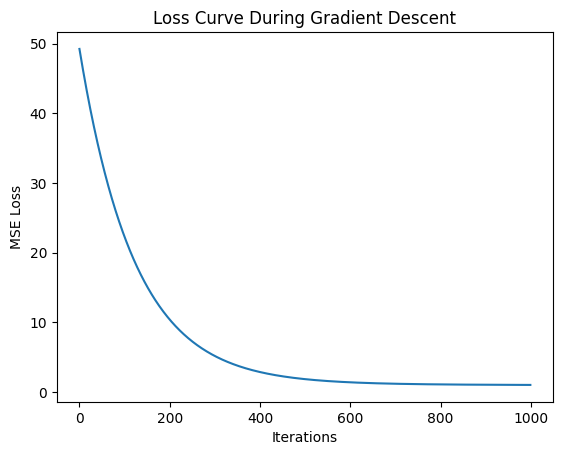

In [15]:
# Create sample data
np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X.squeeze() + np.random.randn(100)  # y = 4 + 3*x + noise

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegressionGD(lr=0.001, n_iters=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Test MSE:", model.mse(X_test, y_test))

# Plot loss curve
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Curve During Gradient Descent")
plt.show()


# ⭐ 2. Polynomial Regression

Linear Regression fails when the data is **curved**.

Polynomial Regression fits **non-linear curves**.

### 📌 Equation (for degree = 2):
y = b0 + b1x + b2x²

### ✔ When to use?
- When relationship is **non-linear**
- Examples:
  - Growth curves  
  - Temperature trends  
  - Physics data  

Polynomial regression still uses Linear Regression underneath but transforms features into higher degree terms.


Predicted values: [  6.57142857  11.71428571  40.42857143  92.71428571 168.57142857]


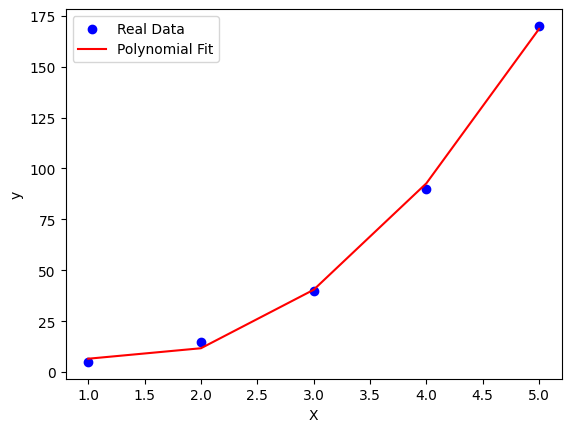

In [5]:
# Polynomial Regression Example

# Non-linear data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([5, 15, 40, 90, 170])  # Quadratic relationship

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

pred = model.predict(X_poly)

print("Predicted values:", pred)

# Plot
plt.scatter(X, y, color='blue', label="Real Data")
plt.plot(X, pred, color='red', label="Polynomial Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


# 🎓 Polynomial Regression — From Scratch (with Gradient Descent)

Polynomial Regression is an extension of Linear Regression where we transform
the input features into polynomial features:

Example (degree = 3):
- x → [1, x, x², x³]

The model becomes:

\[
y = w_0 + w_1 x + w_2 x^2 + ... + w_d x^d
\]

We will implement:
- Polynomial feature expansion (like sklearn PolynomialFeatures)
- A Linear Regression model optimized with Gradient Descent
- A class `PolynomialRegression` similar to sklearn
- MSE loss
- Coefficients (`coef_`) and intercept (`intercept_`)
- Loss tracking


# 📌 Polynomial Feature Expansion

We create a helper class `PolynomialFeatures` like sklearn.

Example:
X = [[2], [3]]
degree = 3

Output:
[[1, 2, 4, 8],
 [1, 3, 9, 27]]


In [16]:
class PolynomialFeatures:
    def __init__(self, degree=2):
        self.degree = degree

    def fit_transform(self, X):
        X = np.array(X)
        n_samples = X.shape[0]

        poly_features = [np.ones(n_samples)]  # bias term (1)

        for deg in range(1, self.degree + 1):
            poly_features.append(X[:, 0] ** deg)

        return np.vstack(poly_features).T  # shape: (n_samples, degree+1)


# 📘 PolynomialRegression Class

We implement polynomial regression using:

- PolynomialFeatures
- Gradient Descent
- MSE loss function

Model:
\[
y_{pred} = X_{\text{poly}} \cdot w
\]
where weights include the intercept.


In [17]:
class PolynomialRegression:
    def __init__(self, degree=2, lr=0.01, n_iters=1000):
        self.degree = degree
        self.lr = lr
        self.n_iters = n_iters
        self.loss_history = []
        self.coef_ = None
        self.intercept_ = None
        self.weights_ = None  # includes bias
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        # Step 1: polynomial features
        poly = PolynomialFeatures(self.degree)
        X_poly = poly.fit_transform(X)

        n_samples, n_features = X_poly.shape
        
        # Initialize weights
        self.weights_ = np.zeros(n_features)

        # Gradient Descent
        for i in range(self.n_iters):
            y_pred = np.dot(X_poly, self.weights_)

            # gradients
            dw = -(2/n_samples) * np.dot(X_poly.T, (y - y_pred))

            # update weights
            self.weights_ -= self.lr * dw

            # loss
            loss = (1/n_samples) * np.sum((y - y_pred)**2)
            self.loss_history.append(loss)

        # separate coef & intercept
        self.intercept_ = self.weights_[0]
        self.coef_ = self.weights_[1:]
    
    def predict(self, X):
        X = np.array(X)
        poly = PolynomialFeatures(self.degree)
        X_poly = poly.fit_transform(X)
        return np.dot(X_poly, self.weights_)
    
    def mse(self, X, y):
        y_pred = self.predict(X)
        return np.mean((y - y_pred)**2)


# 🎯 Testing Polynomial Regression Model

We generate a cubic dataset:

\[
y = 5 + 2x + 1.5x^2 - 0.5x^3 + \text{noise}
\]


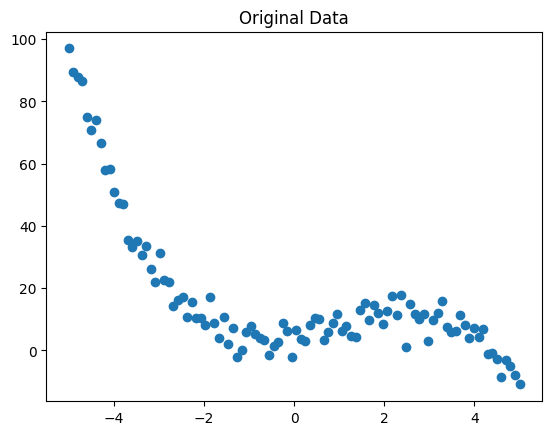

In [18]:
np.random.seed(42)

X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 5 + 2*X[:,0] + 1.5*(X[:,0]**2) - 0.5*(X[:,0]**3) + np.random.randn(100)*4

plt.scatter(X, y)
plt.title("Original Data")
plt.show()


In [19]:
model = PolynomialRegression(degree=3, lr=0.001, n_iters=5000)
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Final MSE:", model.mse(X, y))


Intercept: nan
Coefficients: [nan nan nan]
Final MSE: nan


d:\Python\ml-basics\.venv\lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\prito\AppData\Local\Temp\ipykernel_12360\3059373526.py:35: RuntimeWarning: overflow encountered in square
  loss = (1/n_samples) * np.sum((y - y_pred)**2)
C:\Users\prito\AppData\Local\Temp\ipykernel_12360\3059373526.py:32: RuntimeWarning: invalid value encountered in subtract
  self.weights_ -= self.lr * dw


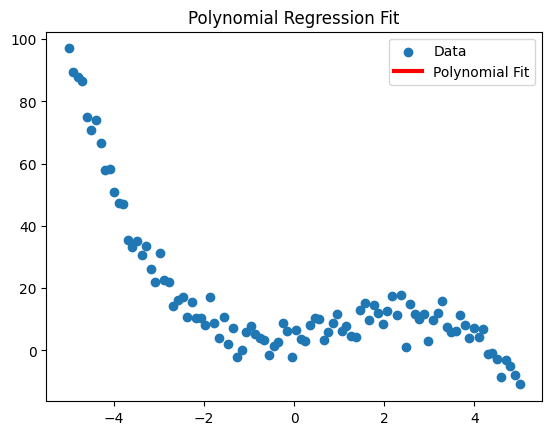

In [20]:
y_pred = model.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', linewidth=3, label="Polynomial Fit")
plt.legend()
plt.title("Polynomial Regression Fit")
plt.show()


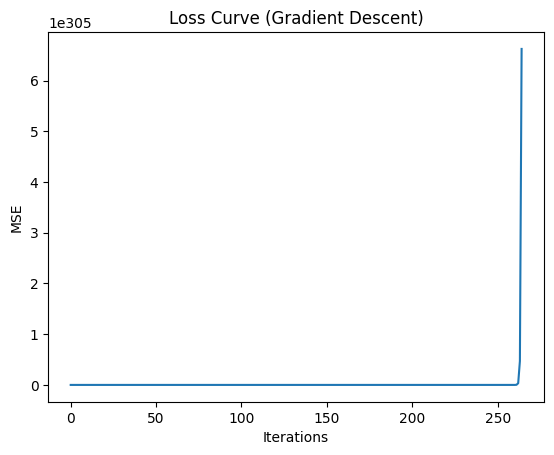

In [21]:
plt.plot(model.loss_history)
plt.title("Loss Curve (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()


# ⭐ 3. Ridge Regression (L2 Regularization)

Ridge Regression adds a **penalty** to large coefficients to prevent overfitting.

### 📌 Ridge Cost Function:
MSE + α * (sum of squared coefficients)

### ✔ Why use Ridge?
- Prevents overfitting  
- Works well when many features  
- Shrinks coefficients but **never makes them zero**

### ✔ Parameter:
- **alpha (λ)** → controls penalty  
  - High α = more penalty  
  - Low α = normal linear regression  


Ridge Coefficient: [21.45454545]
Ridge Intercept: -22.16363636363637


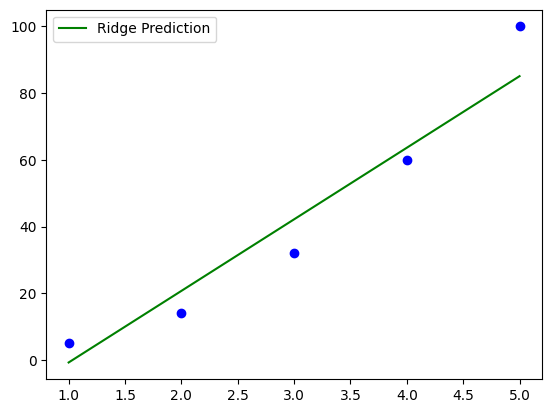

In [6]:
# Ridge Regression Example

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([5, 14, 32, 60, 100])  # Slightly curved dataset

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

ridge_pred = ridge.predict(X)

print("Ridge Coefficient:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)

plt.scatter(X, y, color='blue')
plt.plot(X, ridge_pred, color='green', label="Ridge Prediction")
plt.legend()
plt.show()


# ⭐ 4. Lasso Regression (L1 Regularization)

Lasso Regression adds a penalty based on **absolute value** of coefficients.

### 📌 Lasso Cost Function:
MSE + α * (sum of |coefficients|)

### ✔ Why use Lasso?
- Reduces overfitting  
- Performs **feature selection**  
- Can shrink some coefficients to **zero**

### ✔ Parameter:
- **alpha** → penalty strength  


Lasso Coefficient: [23.55]
Lasso Intercept: -28.450000000000003


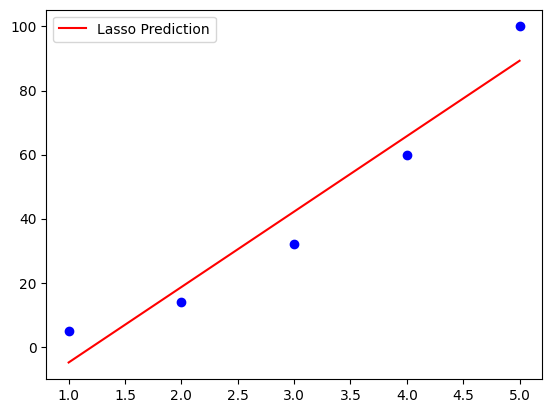

In [7]:
# Lasso Regression Example

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([5, 14, 32, 60, 100])

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

lasso_pred = lasso.predict(X)

print("Lasso Coefficient:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)

plt.scatter(X, y, color='blue')
plt.plot(X, lasso_pred, color='red', label="Lasso Prediction")
plt.legend()
plt.show()


# ✅ Summary of Regression Algorithms

### ⭐ Linear Regression  
- Fits straight line  
- Simple, easy to interpret  

### ⭐ Polynomial Regression  
- Fits curves  
- Good for non-linear datasets  

### ⭐ Ridge Regression (L2)  
- Helps reduce overfitting  
- Shrinks coefficients (but not to zero)  
- Best when many correlated features  

### ⭐ Lasso Regression (L1)  
- Can shrink coefficients to **zero**  
- Good for **feature selection**  
- Reduces model complexity  

These algorithms are fundamentals of Machine Learning Regression.  
Next chapters can include:
- ElasticNet Regression  
- Logistic Regression  
- Decision Trees  
- Random Forest  
- Gradient Boosting  
